In [1]:
# 회귀모형 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

# 쓸데없는 알림 방지
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#통계적 모형
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

#머신러닝
from sklearn import datasets
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

In [2]:
!pip install --upgrade pip

In [3]:
! pip install scikit-learn 

In [4]:
boston = datasets.load_boston()

In [5]:
x = boston.data
y = boston.target

boston_raw_data = pd.concat([pd.DataFrame(y, columns=['label']), pd.DataFrame(x, columns=boston.feature_names)], axis=1)

In [6]:
boston_raw_data

,label,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
round(boston_raw_data.T.describe(),2)

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
count,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,...,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00
mean,59.64,56.24,55.30,52.59,53.73,53.26,61.52,64.54,64.08,62.39,...,67.54,66.81,66.53,66.89,67.35,57.84,58.52,59.58,59.14,58.11
std,124.29,117.35,116.18,114.35,114.73,114.24,125.85,126.13,124.17,124.14,...,139.57,139.77,139.74,139.60,139.86,120.05,121.26,121.49,120.73,121.57
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.33,0.85,0.85,0.89,0.89,0.89,5.14,5.24,5.16,5.25,...,1.14,1.16,1.04,1.04,1.06,0.68,0.68,0.68,0.68,0.68
50%,5.78,6.75,6.02,4.53,5.70,5.64,10.15,10.18,10.18,10.18,...,7.84,7.84,7.85,7.84,7.86,8.13,7.60,6.31,6.64,6.96
75%,22.50,20.65,30.48,29.72,31.83,26.20,20.98,25.11,26.57,18.45,...,20.78,18.97,20.70,18.77,18.60,22.05,20.90,23.17,21.75,18.73
max,396.90,396.90,392.83,394.63,396.90,394.12,395.60,396.90,386.63,386.71,...,396.90,396.90,396.90,395.77,396.90,391.99,396.90,396.90,393.45,396.90


### 1978 Boston Price of Real Estate 
- town of 506 가격의 중앙값(단위 : 1000달러) 

### feature 
- crim : 도시의 범죄율 
- indus : 비소매 상업 지역의 면적비율 
- nox : 일산화질소 농도 
- rm : 주택당 방의 갯수 
- lstat : 인구 중 하위 계층의 비율 
- b : 인구 중 흑인비율
- ptratio : 학생과 교사의 비율 
- zn : 25,000 평방피트를 초과하는 거주 지역 비율
- chas : 강변뷰 1, 일반뷰 0
- age : 40년 이전에 건축된 주택의 비율(건축물의 노후화)
- rad : 방사형 고속도로까지의 거리 
- tax : 재산세율 
- dis : 직업센터와 거리 

# 단순선형회귀 분석
- 입력변수 x와 반응변수 y사이에 선형적인 관계를 가정한다. 
- 반응변수 y는 레이블
- 입력변수 x는 단일변수가 된다. (범죄율, 하위계층 비율, 방의 갯수)


In [8]:
crime = boston_raw_data['CRIM']
crime = sm.add_constant(crime, has_constant='add') # 절편값 추가 

In [9]:
crime #(const(beta0) * Crim(beta1))

,const,CRIM
0,1.0,0.00632
1,1.0,0.02731
2,1.0,0.02729
3,1.0,0.03237
4,1.0,0.06905
...,...,...
501,1.0,0.06263
502,1.0,0.04527
503,1.0,0.06076
504,1.0,0.10959


In [10]:
boston_crime_model = sm.OLS(boston_raw_data['label'], crime).fit()

In [11]:
boston_crime_model.summary() # 스케일링 이전의 작업 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Wed, 30 Dec 2020   Prob (F-statistic):           1.17e-19
Time:                        14:10:27   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 범죄율과 집값 사이읭 관계를 그림으로 확인

In [12]:
# 학습셋과 검증셋을 따로 분리하지 않았다. 
# 학습셋에 대한 정확도를 보는 것 
crime_predict = boston_crime_model.predict(crime)

findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.


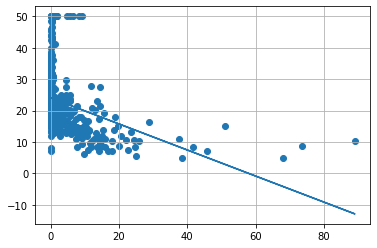

In [13]:
plt.scatter(crime['CRIM'], boston_raw_data['label']) #label은 집값 
plt.plot(crime['CRIM'], crime_predict) # 편향성을 갖는 형태 
plt.grid()
plt.show()
# 범죄율이 낮은 곳은 높은 집값으로 나타난것이 확인된다. (반비례)

# 선형회귀
$$
     f(x) = \beta_0 + \beta_1x_1 + \epsilon
$$
- 오차는 정규분포임을 가정 
- 오차가 정규분포임을 가정한다는 것은 랜덤하다는 뜻으로 예측 불가능 

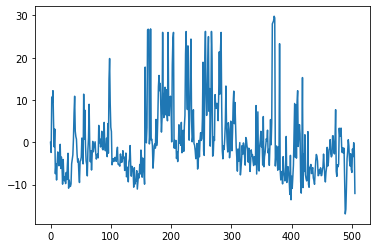

In [14]:
# resid = 잔차 
boston_crime_model.resid.plot()
plt.show()

## rm(방 갯수)과 lstat(하위계층)의 비율에 대해서 확인해보자
- 각각 단순선형회귀분석에 적합해보자 

In [15]:
rm = boston_raw_data["RM"]
lstat = boston_raw_data["LSTAT"]

# beta0를 구하는 과정 
rm = sm.add_constant(rm, has_constant='add')
lstat = sm.add_constant(lstat, has_constant='add')

In [16]:
boston_rm_model = sm.OLS(boston_raw_data['label'], rm).fit()
boston_lstat_model = sm.OLS(boston_raw_data['label'], lstat).fit()

In [17]:
boston_rm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 30 Dec 2020   Prob (F-statistic):           2.49e-74
Time:                        14:10:28   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
rm_predict = boston_rm_model.predict(rm)

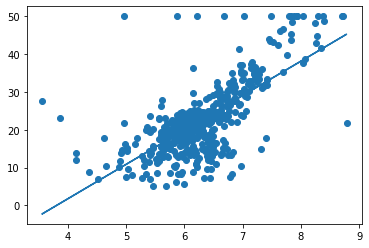

In [19]:
plt.scatter(rm['RM'], boston_raw_data['label'])
plt.plot(rm['RM'], rm_predict)
plt.show()
# 잘 적합되는 것을 파악할 수 있다. 

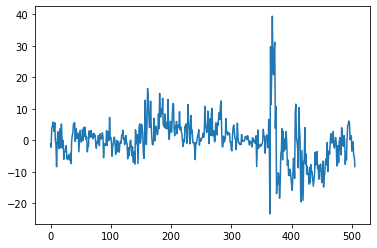

In [20]:
boston_rm_model.resid.plot()

In [21]:
boston_lstat_model.summary() # coef 확인결과 음수로 반비례하는 결과를 나타낸다. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 30 Dec 2020   Prob (F-statistic):           5.08e-88
Time:                        14:10:28   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

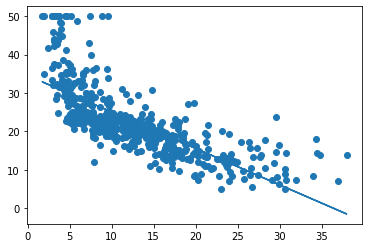

In [22]:
lstat_predict = boston_lstat_model.predict(lstat)

plt.scatter(lstat['LSTAT'], boston_raw_data['label'])
plt.plot(lstat['LSTAT'], lstat_predict)
plt.show()
# 하위계층이 낮을수록 집값이 낮아지고 있다. 

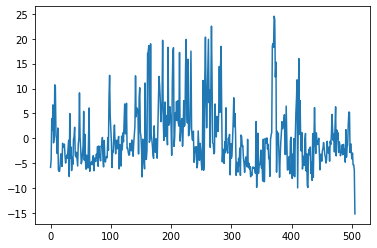

In [23]:
boston_lstat_model.resid.plot()

## 다중선형회귀분석 실습 
- crime, rm, lstat 

In [24]:
multi = boston_raw_data[['CRIM', "RM", 'LSTAT']]
multi = sm.add_constant(multi, has_constant='add')
target = boston_raw_data['label']

In [25]:
boston_multi_model = sm.OLS(target, multi).fit()

In [26]:
boston_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Wed, 30 Dec 2020   Prob (F-statistic):          1.01e-112
Time:                        14:10:29   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# 비례, 반비례 관계는 유지되었다. 
# 하지만 다중회귀로 파악해본 결과 선형 회귀 계수때보다 낮게 나왔다. 

boston_rm_model.params

const   -34.670621
RM        9.102109
dtype: float64

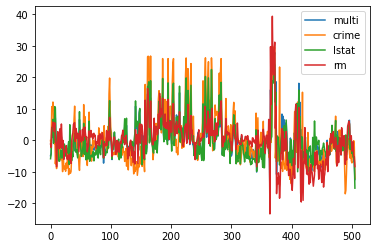

In [28]:
# 앞서 파악한 RM과 LSTAT, CRIME의 오차항의 특징들이 한꺼번에 나타나는 것을 파악할 수 있다.
boston_multi_model.resid.plot(label='multi')
boston_crime_model.resid.plot(label='crime')
boston_lstat_model.resid.plot(label='lstat')
boston_rm_model.resid.plot(label='rm')
plt.legend()

## 전체 변수를 이용한 FULL 모델 

In [29]:
boston_raw_data.iloc[:,1:]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [30]:
full = boston_raw_data.iloc[:,1:]
full = sm.add_constant(full, has_constant='add')
target = boston_raw_data['label']

In [31]:
boston_full_model = sm.OLS(target, full).fit()
boston_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 30 Dec 2020   Prob (F-statistic):          6.72e-135
Time:                        14:10:29   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

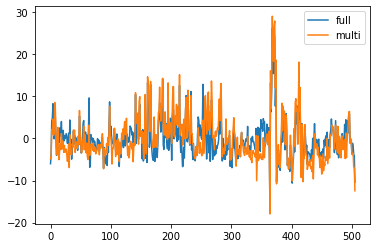

In [32]:
boston_full_model.resid.plot(label='full')
boston_multi_model.resid.plot(label='multi')
plt.legend()

# 두 지표가 유사하게 나옴을 확인

## 상관계수를 통한 다중공선성 확인 

In [33]:
full.corr()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRIM,NaN,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,NaN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,NaN,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,NaN,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,NaN,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,NaN,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,NaN,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,NaN,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,NaN,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


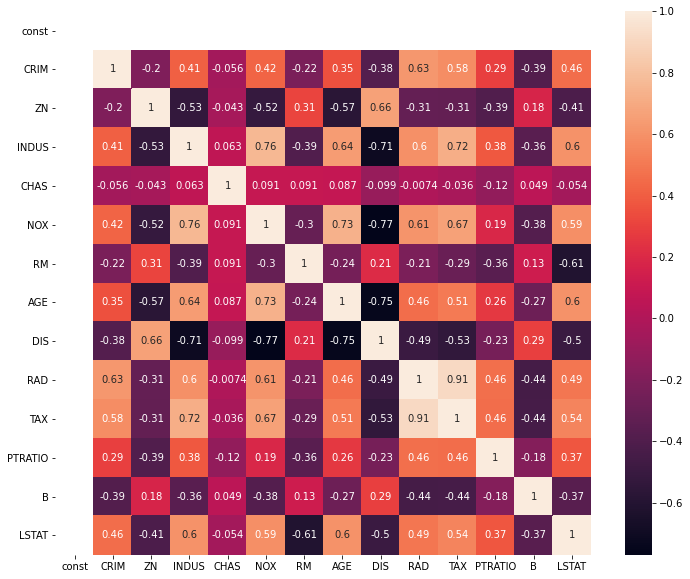

In [40]:
plt.figure(figsize=(12,10))
sns.heatmap(full.corr(), annot=True)
plt.show()

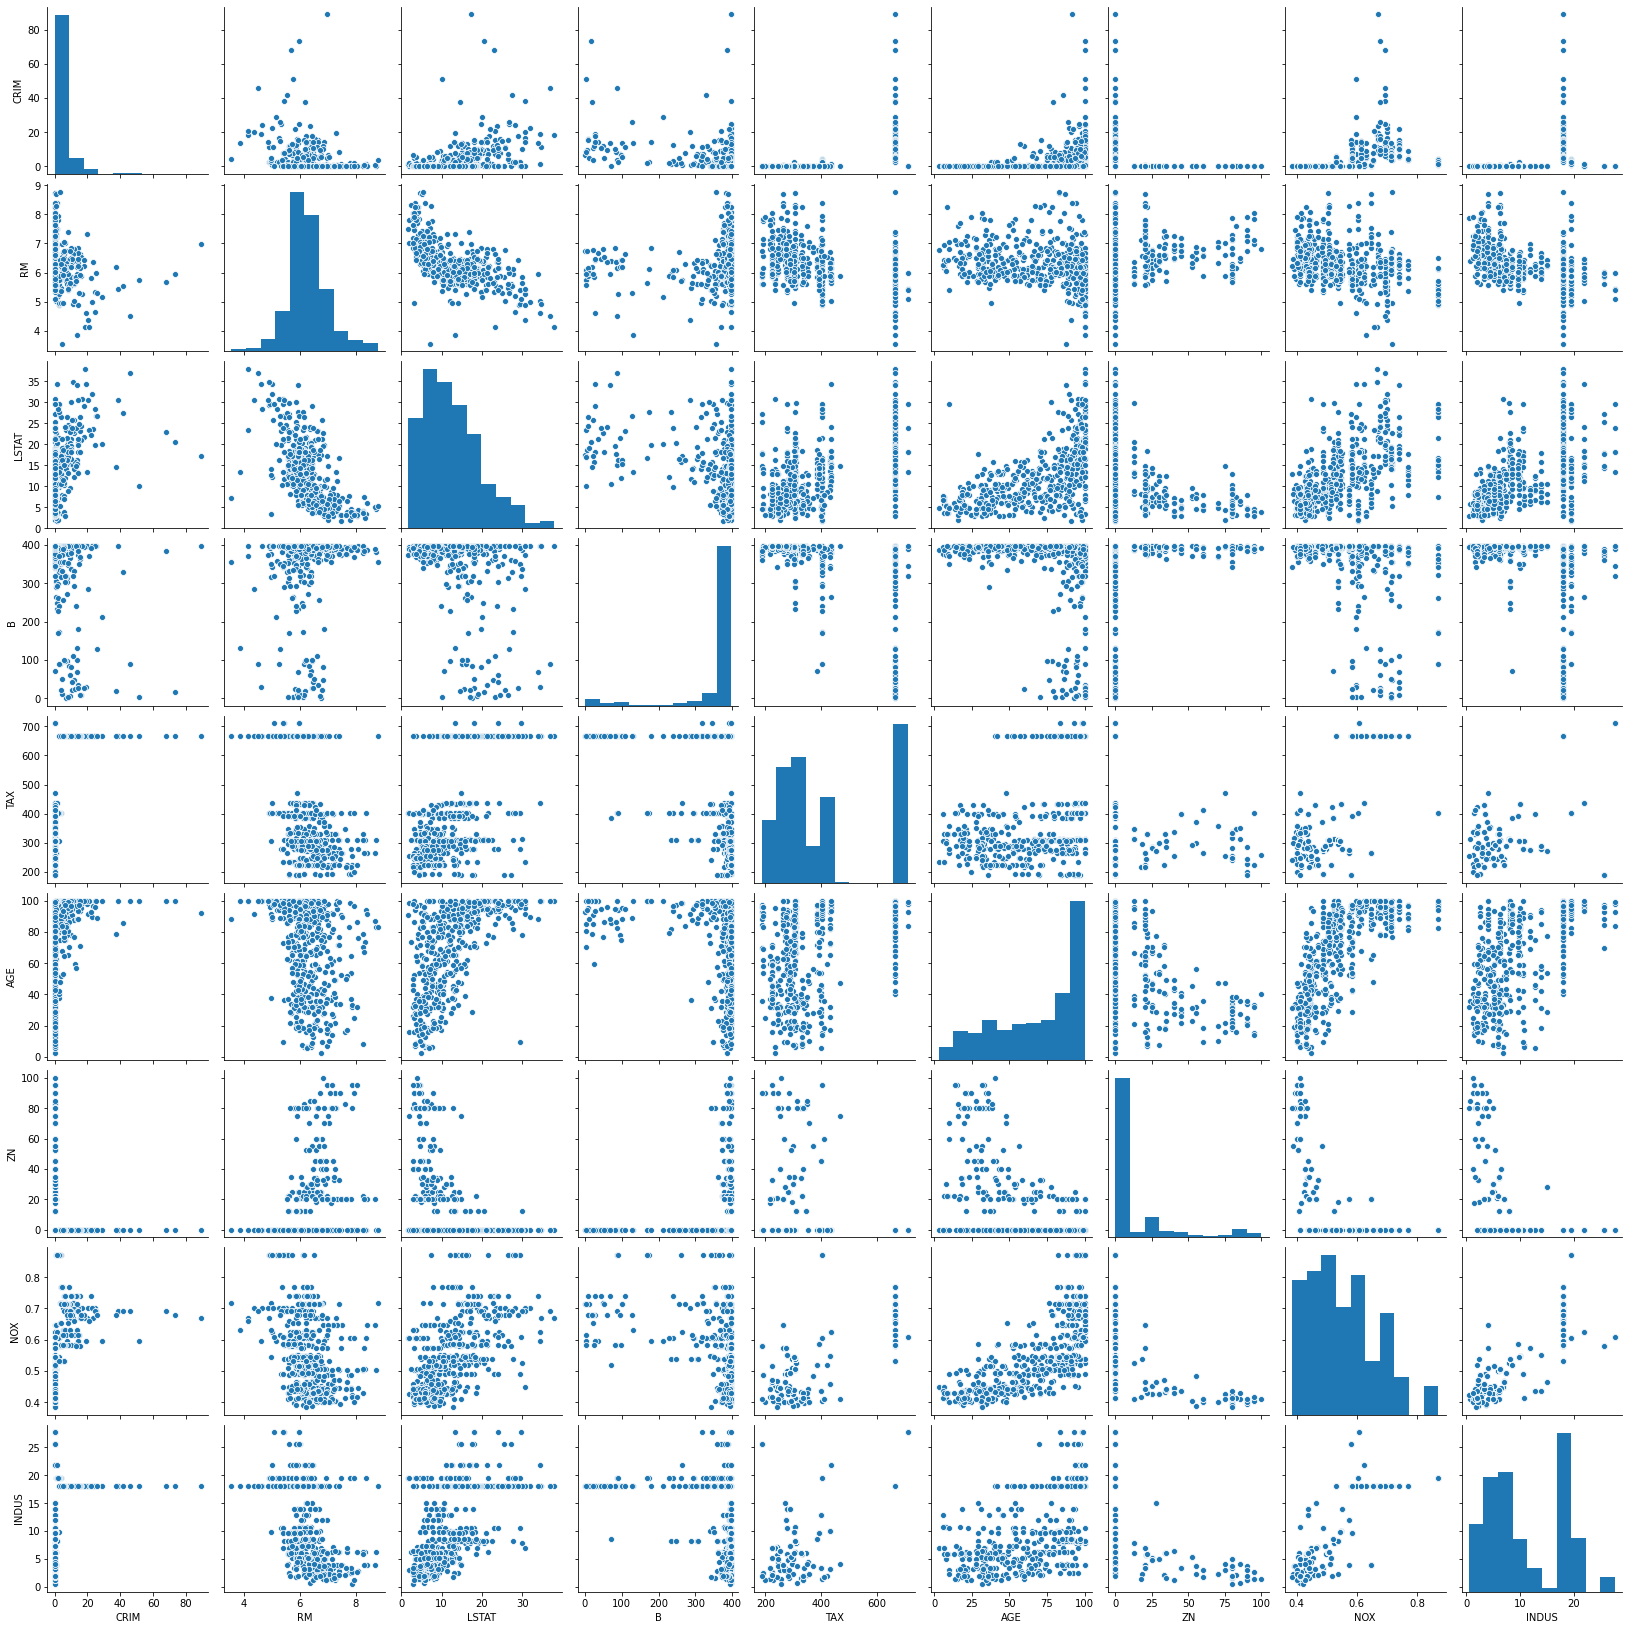

In [39]:
sns.pairplot(full[['CRIM', 'RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS']])
plt.show()

In [52]:
vif = pd.DataFrame()
                        # 상관계수가 큰 것을 뺴주기 
vif_data = full.drop(['const', 'CHAS', "PTRATIO", 'NOX', 'TAX', 'RM'], axis=1) # const가 너무 높게 나와서 제외할 예정 
vif['VIF Factor'] = [variance_inflation_factor(
    vif_data.values, i) for i in range(vif_data.shape[1])
]
vif['features'] = vif_data.columns

In [54]:
vif_data = sm.add_constant(vif_data, has_constant='add')
boston_vif_model = sm.OLS(target, vif_data).fit()

In [55]:
boston_vif_model.summary()
# 위에서 진행한 LSTAT 계수와 별다른 차이를 보지 않고 있다. 
# 위에서 세가지 변수와 함께한 LSTAT와는 차이를 보이고 있으나 여전히 음수 계수가 나타난다.
# 다중계수를 제거한 결과 근접한 것으로 파악한다. 

# crime의 경우 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     104.1
Date:                Wed, 30 Dec 2020   Prob (F-statistic):          4.15e-101
Time:                        15:23:35   Log-Likelihood:                -1591.3
No. Observations:                 506   AIC:                             3201.
Df Residuals:                     497   BIC:                             3239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.3775      2.131     18.481      0.000      35.191      43.564
CRIM          -0.1117      0.039     -2.854      0.004      -0.189      -0.035
ZN             0.0945      0.015      6.361      0.000       0.065       0.124
INDUS         -0.2850      0.061     -4.687      0.000      -0.404      -0.166
AGE            0.0131      0.015      0.878      0.380      -0.016       0.042
DIS           -1.8153      0.221     -8.219      0.000      -2.249      -1.381
RAD            0.0255      0.043      0.590      0.556      -0.059       0.111
B              0.0070      0.003      2.200      0.028       0.001       0.013
LSTAT         -0.8757      0.050    -17.532      0.000      -0.974      -0.778
==============================================================================
Omnibus:                      128.163   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.569
Skew:                           1.340   Prob(JB):                     3.23e-61
Kurtosis:                       5.457   Cond. No.                     3.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
x = full
y = target # label 

train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8, test_size=0.2, random_state=1234)

In [68]:
boston_full_train_model = sm.OLS(train_y, train_x).fit()

In [69]:
boston_full_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     79.10
Date:                Wed, 30 Dec 2020   Prob (F-statistic):          1.19e-100
Time:                        15:37:37   Log-Likelihood:                -1197.0
No. Observations:                 404   AIC:                             2422.
Df Residuals:                     390   BIC:                             2478.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.7372      5.822      7.856      0.000      34.291      57.183
CRIM          -0.1020      0.038     -2.658      0.008      -0.178      -0.027
ZN             0.0601      0.015      3.895      0.000       0.030       0.090
INDUS          0.0348      0.071      0.490      0.624      -0.105       0.174
CHAS           3.0035      0.952      3.155      0.002       1.132       4.875
NOX          -20.4147      4.291     -4.758      0.000     -28.851     -11.979
RM             2.8937      0.472      6.136      0.000       1.966       3.821
AGE           -0.0053      0.015     -0.350      0.727      -0.035       0.025
DIS           -1.7626      0.242     -7.292      0.000      -2.238      -1.287
RAD            0.3389      0.076      4.435      0.000       0.189       0.489
TAX           -0.0135      0.004     -3.056      0.002      -0.022      -0.005
PTRATIO       -1.0192      0.148     -6.897      0.000      -1.310      -0.729
B              0.0104      0.003      3.500      0.001       0.005       0.016
LSTAT         -0.5257      0.055     -9.616      0.000      -0.633      -0.418
==============================================================================
Omnibus:                      150.919   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              659.360
Skew:                           1.590   Prob(JB):                    6.64e-144
Kurtosis:                       8.391   Cond. No.                     1.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

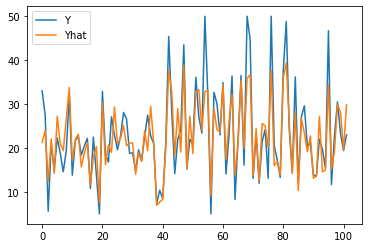

In [77]:
full_train_predict = boston_full_train_model.predict(test_x)
plt.plot(np.array(test_y), label='Y')
plt.plot(np.array(full_train_predict), label='Yhat')
plt.legend()
plt.show()

In [82]:
x = full
y = target # label 

train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8, test_size=0.2, random_state=1234)

In [79]:
boston_vif_train_model = sm.OLS(train_y, train_x).fit()

In [80]:
boston_vif_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     79.10
Date:                Wed, 30 Dec 2020   Prob (F-statistic):          1.19e-100
Time:                        16:04:08   Log-Likelihood:                -1197.0
No. Observations:                 404   AIC:                             2422.
Df Residuals:                     390   BIC:                             2478.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.7372      5.822      7.856      0.000      34.291      57.183
CRIM          -0.1020      0.038     -2.658      0.008      -0.178      -0.027
ZN             0.0601      0.015      3.895      0.000       0.030       0.090
INDUS          0.0348      0.071      0.490      0.624      -0.105       0.174
CHAS           3.0035      0.952      3.155      0.002       1.132       4.875
NOX          -20.4147      4.291     -4.758      0.000     -28.851     -11.979
RM             2.8937      0.472      6.136      0.000       1.966       3.821
AGE           -0.0053      0.015     -0.350      0.727      -0.035       0.025
DIS           -1.7626      0.242     -7.292      0.000      -2.238      -1.287
RAD            0.3389      0.076      4.435      0.000       0.189       0.489
TAX           -0.0135      0.004     -3.056      0.002      -0.022      -0.005
PTRATIO       -1.0192      0.148     -6.897      0.000      -1.310      -0.729
B              0.0104      0.003      3.500      0.001       0.005       0.016
LSTAT         -0.5257      0.055     -9.616      0.000      -0.633      -0.418
==============================================================================
Omnibus:                      150.919   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              659.360
Skew:                           1.590   Prob(JB):                    6.64e-144
Kurtosis:                       8.391   Cond. No.                     1.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

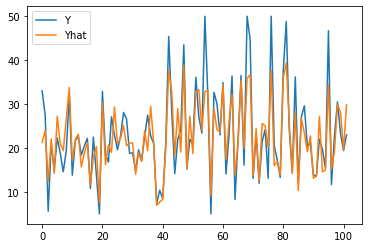

In [84]:
vif_train_predict = boston_vif_train_model.predict(test_x)
plt.plot(np.array(test_y), label="Y")
plt.plot(np.array(vif_train_predict), label='Yhat')
plt.legend()

## MSE를 통한 검증에 대한 성능 비교 
- Mean Squared Error 


In [92]:
x = full
y = target # label 

train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8, test_size=0.2, random_state=1234)
mean_squared_error(y_true=test_y, y_pred=boston_full_train_model.predict(test_x))

23.964571384956905

In [95]:
x = vif_data
y = target # label 

train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8, test_size=0.2, random_state=1234)
boston_vif_train_model = sm.OLS(train_y, train_x).fit()
mean_squared_error(y_true=test_y, y_pred=boston_vif_train_model.predict(test_x))

37.79811056353681